In [3]:
from google.colab import files
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing (1).csv


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/AmesHousing (1).csv')

# Display the first few rows and basic information
print(df.head())
print(df.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [6]:
# Check for missing values
print(df.isnull().sum())

# For numerical columns, fill with median
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns, fill with mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

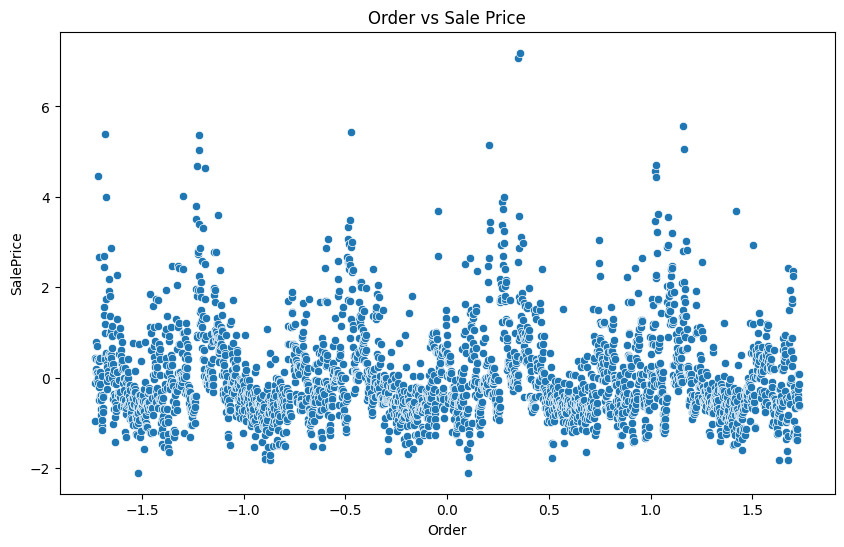

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find a numerical column (excluding 'SalePrice') to plot against SalePrice
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
x_column = [col for col in numerical_columns if col != 'SalePrice'][0]  # Select the first numerical column that's not SalePrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y='SalePrice', data=df)
plt.title(f'{x_column} vs Sale Price')
plt.show()

In [14]:
# First, let's see what columns we actually have
print(df.columns)

# Now, let's create a total square footage feature using available area columns
area_columns = [col for col in df.columns if 'area' in col.lower() or 'sf' in col.lower()]
print("Available area-related columns:", area_columns)

if area_columns:
    df['TotalSF'] = df[area_columns].sum(axis=1)
    print("Created 'TotalSF' by summing these columns:", area_columns)
else:
    print("No area-related columns found. Skipping TotalSF creation.")

# Select top features correlated with SalePrice
corr = df.corr()['SalePrice'].abs().sort_values(ascending=False)
top_features = corr[1:11].index.tolist()  # Exclude SalePrice itself
print("Top 10 features correlated with SalePrice:", top_features)

# Use these top features for our model
X = df[top_features]
y = df['SalePrice']

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [16]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R2 Score: {r2:.4f}\n")

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")

Linear Regression Performance:
MAE: $0.29
RMSE: $0.46
R2 Score: 0.8352

Random Forest Performance:
MAE: $0.23
RMSE: $0.41
R2 Score: 0.8691



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


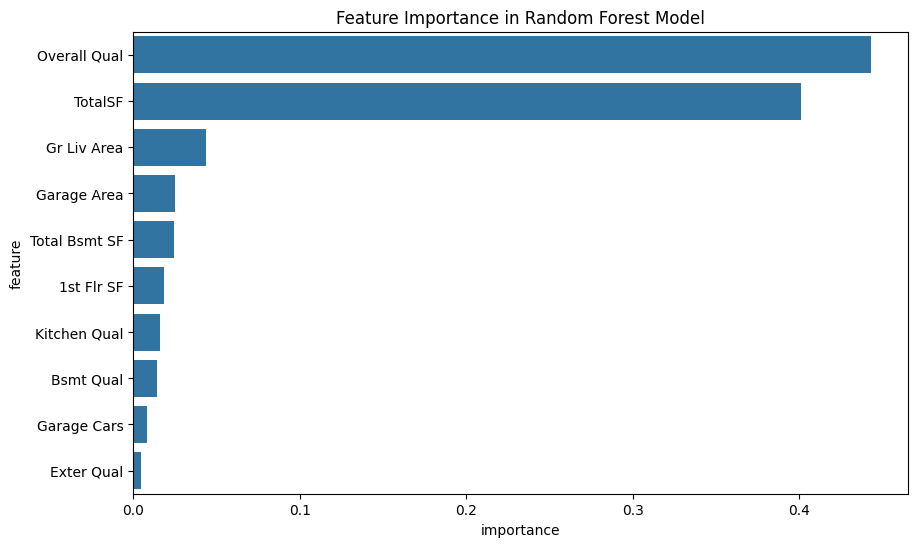

In [17]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()